> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# Homework

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Cheers_Stats_Beers.md)

1. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

In the folder "../data" is a comma separated value (CSV) file,
"transistor_data.csv" [taken from wikipedia
01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors).

a. Use the `!head ../data/transistor_data.csv` command to look at
the top of the csv. What are the headings for the columns?

b. Load the csv into a pandas dataframe. How many missing values
(`NaN`) are
in the column with the number of transistors? What fraction are
missing?

In [6]:
# a. Reading the top of the CSV to get the column headings:
file_path = "../data/transistor_data.csv"

# I am doing this on a windows machine, so I don't think !head will work
with open(file_path, 'r') as file:
    for _ in range(5):  # Displaying first 5 lines
        print(file.readline())

# b. Loading the CSV into a pandas dataframe:
df = pd.read_csv(file_path)

df.head()

# Count the number of NaN values in the "MOS transistor count" column
nan_count = df['MOS transistor count'].isnull().sum()


total_values = len(df['MOS transistor count'])


nan_fraction = nan_count / total_values

df.head()

Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area

"MP944 (20-bit, 6-chip)",NaN,1970,Garrett AiResearch,?,?

"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000Â nm",12Â mmÂ²

"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000Â nm",14Â mmÂ²

"NEC Î¼COM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500Â nm",?



,Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
0,"MP944 (20-bit, 6-chip)",NaN,1970,Garrett AiResearch,?,?
1,"Intel 4004 (4-bit, 16-pin)",2250.0,1971,Intel,"10,000 nm",12 mm²
2,"Intel 8008 (8-bit, 18-pin)",3500.0,1972,Intel,"10,000 nm",14 mm²
3,"NEC μCOM-4 (4-bit, 42-pin)",2500.0,1973,NEC,"7,500 nm",?
4,"Intel 4040 (4-bit, 16-pin)",3000.0,1974,Intel,"10,000 nm",12 mm²


In [7]:
print(f"Number of NaN values in 'MOS transistor count' column: {nan_count}")
print(f"Fraction of values in 'MOS transistor count' that are NaN: {nan_fraction:.2f}")

Number of NaN values in 'MOS transistor count' column: 7
Fraction of values in 'MOS transistor count' that are NaN: 0.04


## Problems [Part 2](./02_Seeing_Stats.md)

1. Many beers do not report the IBU of the beer because it is very
small. You may be accidentally removing whole categories of beer from
our dataset by removing rows that do not include the IBU measure. 

    a. Use the command `beers_filled = beers.fillna(0)` to clean the `beers` dataframe
    
    b. Recreate the plot "Beer ABV vs. IBU mean values by style" 
    [bubble
    plot](https://cooperrc.github.io/computational-mechanics/module_02/02_Seeing_Stats.html#bubble-chart) with `beers_filled`. What differences do you notice between the plots?

In [8]:
# Part a
beer_file_path = "../data/beers.csv"


# Loading the CSV into a pandas dataframe:
beers = pd.read_csv(beer_file_path)
beers_filled = beers.fillna(0)

beers_filled

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,0.0,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,0.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,0.0,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,0.0,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,0.0,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2402,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2403,2406,0.052,0.0,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2404,2407,0.055,0.0,620,B3K Black Lager,Schwarzbier,424,12.0
2405,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


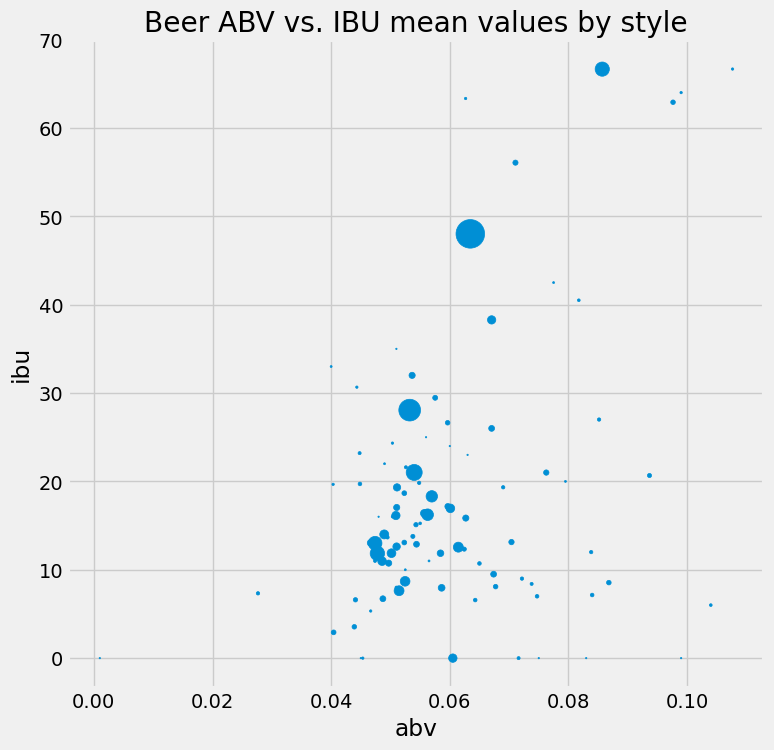

In [9]:
# Part b
beers_filled_styles = beers_filled.drop(['Unnamed: 0','name','brewery_id','ounces','id'], axis=1)

style_means = beers_filled_styles.groupby('style').mean()
style_counts = beers_filled_styles['style'].value_counts()
style_counts = style_counts.sort_index()
style_means.plot.scatter(figsize=(8,8), 
                         x='abv', y='ibu', s=style_counts, 
                         title='Beer ABV vs. IBU mean values by style');

2. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

    In the folder "../data" is a comma separated value (CSV) file, "transistor_data.csv" [taken from wikipedia 01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors). 
    Load the csv into a pandas dataframe, it has the following headings:

    |Processor| MOS transistor count| Date of Introduction|Designer|MOSprocess|Area|
    |---|---|---|---|---|---|

    a. In the years 2017, what was the average MOS transistor count? 
    Make a boxplot of the transistor count in 2017 and find the first, second and third quartiles.

    b. Create a semilog y-axis scatter plot (i.e. `plt.semilogy`) for the 
    "Date of Introduction" vs "MOS transistor count". 
    Color the data according to the "Designer".

Average MOS transistor count in 2017: 7050000000.00


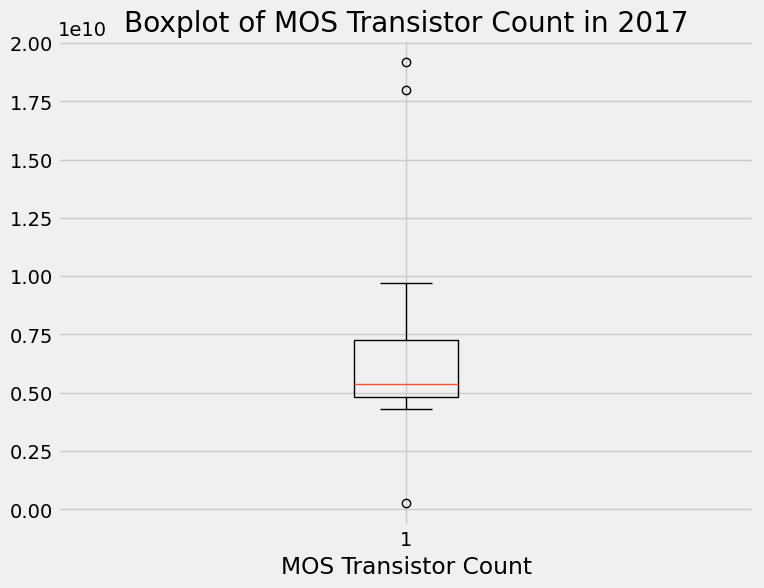

First Quartile: 4800000000.0
Second Quartile (Median): 5375000000.0
Third Quartile: 7250000000.0


In [10]:
# a. Average MOS transistor count in 2017:
df_2017 = df[df["Date of Introduction"] == 2017]
df_2017

average_2017 = df_2017['MOS transistor count'].mean()
print(f"Average MOS transistor count in 2017: {average_2017:.2f}")

# Boxplot for transistor count in 2017
plt.figure(figsize=(8, 6))
plt.boxplot(df_2017['MOS transistor count'])
plt.title("Boxplot of MOS Transistor Count in 2017")
plt.xlabel("MOS Transistor Count")
plt.show()

# Quartiles
q1 = df_2017['MOS transistor count'].quantile(0.25)
q2 = df_2017['MOS transistor count'].quantile(0.50)
q3 = df_2017['MOS transistor count'].quantile(0.75)
print(f"First Quartile: {q1}\nSecond Quartile (Median): {q2}\nThird Quartile: {q3}")


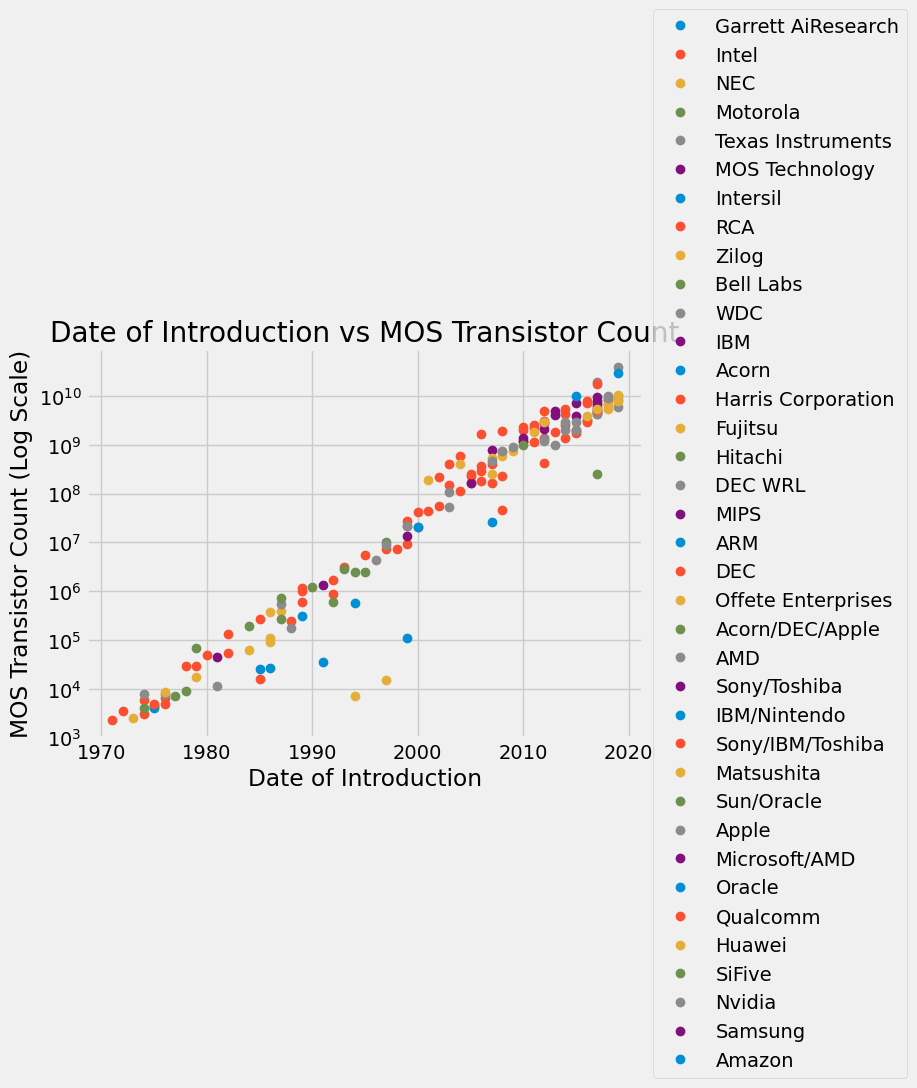

In [11]:
# Part b: semilogy plot
for designer in df['Designer'].unique():
    subset = df[df['Designer'] == designer]
    plt.semilogy(subset['Date of Introduction'], subset['MOS transistor count'], 'o', label=designer)

plt.title("Date of Introduction vs MOS Transistor Count")
plt.xlabel("Date of Introduction")
plt.ylabel("MOS Transistor Count (Log Scale)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Problems [Part 3](03_Linear_Regression_with_Real_Data.md)

1. There is a csv file in '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
Compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

    a. Plot the total energy consumption of the United States and Europe
    
    b. Use a linear least-squares regression to find a function for the energy consumption as a function of year
    
    energy consumed = $f(t) = At+B$
    
    c. At what year would you change split the data and use two lines like you did in the 
    land temperature anomoly? Split the data and perform two linear fits. 
    
    d. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [12]:
energy = pd.read_csv('../data/primary-energy-consumption-by-region.csv')
US = energy[energy['Entity'] == 'United States']
EUR = energy[energy['Entity'] == 'Europe']

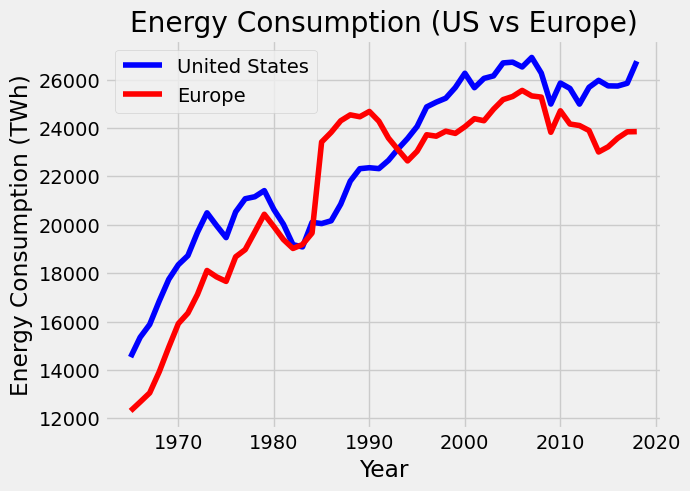

In [13]:
# Part a
plt.plot(US['Year'], US['Primary Energy Consumption (terawatt-hours)'], label='United States', color='blue')
plt.plot(EUR['Year'], EUR['Primary Energy Consumption (terawatt-hours)'], label='Europe', color='red')
plt.title('Energy Consumption (US vs Europe)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Part b

# US regression
US_coeffs = np.polyfit(US['Year'], US['Primary Energy Consumption (terawatt-hours)'], 1)
US_A, US_B = US_coeffs

# Europe regression
EUR_coeffs = np.polyfit(EUR['Year'], EUR['Primary Energy Consumption (terawatt-hours)'], 1)
EUR_A, EUR_B = EUR_coeffs

print(f"US Energy Consumption: f(t) = {US_A:.2f}t + {US_B:.2f}")
print(f"Europe Energy Consumption: f(t) = {EUR_A:.2f}t + {EUR_B:.2f}")

US Energy Consumption: f(t) = 200.40t + -376521.14
Europe Energy Consumption: f(t) = 199.62t + -375985.96


In [15]:
# Part c

# Splitting in the year 2000. This seems like the most drastic change in average slope. Maybe because of CO2 regulations?
split_year = 2000

# Splitting data
US_before = US[US['Year'] < split_year]
US_after = US[US['Year'] >= split_year]

EUR_before = EUR[EUR['Year'] < split_year]
EUR_after = EUR[EUR['Year'] >= split_year]

# Linear fits
US_before_coeffs = np.polyfit(US_before['Year'], US_before['Primary Energy Consumption (terawatt-hours)'], 1)
US_after_coeffs = np.polyfit(US_after['Year'], US_after['Primary Energy Consumption (terawatt-hours)'], 1)

EUR_before_coeffs = np.polyfit(EUR_before['Year'], EUR_before['Primary Energy Consumption (terawatt-hours)'], 1)
EUR_after_coeffs = np.polyfit(EUR_after['Year'], EUR_after['Primary Energy Consumption (terawatt-hours)'], 1)

print(f"US Energy Consumption (before 1990): f(t) = {US_before_coeffs[0]:.2f}t + {US_before_coeffs[1]:.2f}")
print(f"US Energy Consumption (after 1990): f(t) = {US_after_coeffs[0]:.2f}t + {US_after_coeffs[1]:.2f}")
print(f"Europe Energy Consumption (before 1990): f(t) = {EUR_before_coeffs[0]:.2f}t + {EUR_before_coeffs[1]:.2f}")
print(f"Europe Energy Consumption (after 1990): f(t) = {EUR_after_coeffs[0]:.2f}t + {EUR_after_coeffs[1]:.2f}")

US Energy Consumption (before 1990): f(t) = 244.32t + -463550.08
US Energy Consumption (after 1990): f(t) = -24.72t + 75681.86
Europe Energy Consumption (before 1990): f(t) = 347.08t + -667861.11
Europe Energy Consumption (after 1990): f(t) = -77.53t + 180097.69


In [16]:
year = 2025

US_2025_prediction = US_after_coeffs[0] * year + US_after_coeffs[1]
EUR_2025_prediction = EUR_after_coeffs[0] * year + EUR_after_coeffs[1]

print(f"Predicted US energy use in 2025: {US_2025_prediction:.2f} TWh")
print(f"Predicted European energy use in 2025: {EUR_2025_prediction:.2f} TWh")

Predicted US energy use in 2025: 25627.06 TWh
Predicted European energy use in 2025: 23092.66 TWh


2. You plotted Gordon Moore's empirical prediction that the rate of semiconductors on a computer chip would double every two years in [02_Seeing_Stats](./02_Seeing_Stats). This prediction was known as Moore's law. Gordon Moore had originally only expected this empirical relation to hold from 1965 - 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)], but semiconductor manufacuturers were able to keep up with Moore's law until 2015. 

Use a linear regression to find our own historical Moore's Law.    

Use your code from [02_Seeing_Stats](./02_Seeing_Stats) to plot the semilog y-axis scatter plot 
(i.e. `plt.semilogy`) for the "Date of Introduction" vs "MOS transistor count". 
Color the data according to the "Designer".

Create a linear regression for the data in the form of 

$log(transistor~count)= f(date) = A\cdot date+B$

rearranging

$transistor~count= e^{f(date)} = e^B e^{A\cdot date}$

You can perform a least-squares linear regression using the following assignments

$x_i=$ `dataframe['Date of Introduction'].values`

and

$y_i=$ as `np.log(dataframe['MOS transistor count'].values)`

a. Plot your function on the semilog y-axis scatter plot

b. What are the values of constants $A$ and $B$ for our Moore's law fit? How does this compare to Gordon Moore's prediction that MOS transistor count doubles every two years?

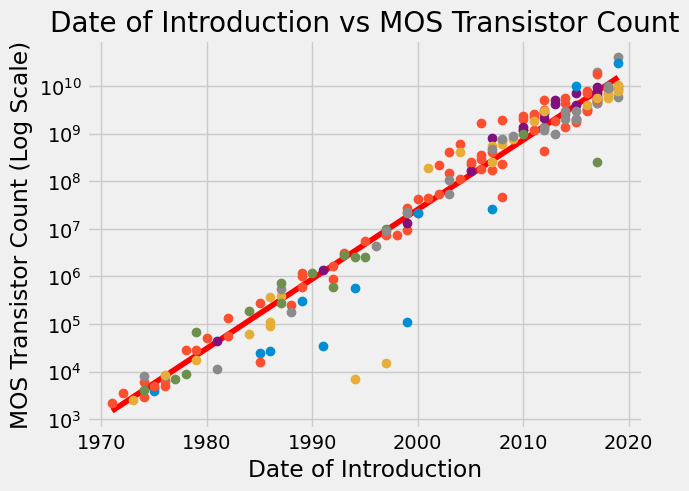

In [17]:
# Part a
data = pd.read_csv('../data/transistor_data.csv')
data = data.dropna()
xi=data['Date of Introduction'].values
TC=data['MOS transistor count'].values

# log of TC
yi = np.log(data['MOS transistor count'].values)

# Linear regression and plotting
A, B = np.polyfit(xi, yi, 1)
plt.semilogy(xi, np.exp(B) * np.exp(A*xi), label='Regression Fit', color='red')

# semilogy plot
for designer in df['Designer'].unique():
    subset = df[df['Designer'] == designer]
    plt.semilogy(subset['Date of Introduction'], subset['MOS transistor count'], 'o', label=designer)


plt.title("Date of Introduction vs MOS Transistor Count")
plt.xlabel("Date of Introduction")
plt.ylabel("MOS Transistor Count (Log Scale)")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
# Part b
doubling_period = np.log(2)/A

print(f"Value of A: {A}")
print(f"Value of B: {B}")
print(f"Predicted doubling period based on data: {doubling_period:.2f} years")
print(f"Moore's Prediction: 2 years")

Value of A: 0.3358855872145298
Value of B: -654.7141981586534
Predicted doubling period based on data: 2.06 years
Moore's Prediction: 2 years


## Problems [Part 4](04_Stats_and_Montecarlo.md)

__1.__ [Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon) is
another way to estimate the value of $\pi$ with random numbers. The goal
in this Monte Carlo estimate of $\pi$ is to create a ratio that is close
to [3.1415926...](http://www.math.com/tables/constants/pi.htm) _similar
to the example with darts points lying inside/outside a unit circle
inside a unit square._ 

![Buffon's needle for parallel
lines](https://upload.wikimedia.org/wikipedia/commons/f/f6/Buffon_needle.gif)

In this Monte Carlo estimation, you only need to know two values:
- the distance from line 0, $x = [0,~1]$
- the orientation of the needle, $\theta = [0,~2\pi]$

The y-location does not affect the outcome of crosses line 0 or not
crossing line 0. 

__a.__ Generate 100 random `x` and `theta` values _remember_ $\theta =
[0,~2\pi]$

__b.__ Calculate the x locations of the 100 needle ends e.g. $x_end = x
\pm \cos\theta$ _since length is unit 1. 

__c.__ Use 
[`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html)
to find the number of needles that have minimum $x_{end~min}<0$ and
maximum $x_{end~max}>0$. The ratio
$\frac{x_{end~min}<0~and~x_{end~max}>0}{number~of~needles} =
\frac{2}{\pi}$ _for large values of $number~of~needles$_.


In [19]:
# Part a

n_samples = 100
x = np.random.uniform(0, 1, n_samples)
theta = np.random.uniform(0, 2*np.pi, n_samples)

In [20]:
# Part b

x_end1 = x + np.cos(theta)
x_end2 = x - np.cos(theta)

In [21]:
# Part c

crossing_needles = np.logical_and(x_end1 < 0, x_end2 > 0) | np.logical_and(x_end1 > 0, x_end2 < 0)
num_crossing_needles = np.sum(crossing_needles)

estimated_pi = (2 * n_samples) / num_crossing_needles

print(f"Estimated value of pi: {estimated_pi}")

Estimated value of pi: 3.6363636363636362


__2.__ Build a random walk data set with steps between $dx = dy =
-1/2~to~1/2~m$. If 100 particles take 10 steps, calculate the number of
particles that move further than 0.5 m. 

_Bonus: Can you do the work without any `for`-loops? Change the size of
`dx` and `dy` to account for multiple particles._

In [22]:
num_particles = 100
num_steps = 10

# Random walk for each particle in x and y directions
dx = np.random.uniform(-0.5, 0.5, (num_particles, num_steps))
dy = np.random.uniform(-0.5, 0.5, (num_particles, num_steps))

# Calculate total movement for each particle in x and y directions
total_dx = np.sum(dx, axis=1)
total_dy = np.sum(dy, axis=1)

# Calculate the total distance each particle has moved
distances = np.sqrt(total_dx**2 + total_dy**2)

# Count the number of particles that moved further than 0.5 m
count = np.sum(distances > 0.5)

print(f"Number of particles that moved further than 0.5 m: {count}")

Number of particles that moved further than 0.5 m: 89


__3.__ 100 steel rods are going to be used to support a 1000 kg structure. The
rods will buckle when the load in any rod exceeds the [critical buckling
load](https://en.wikipedia.org/wiki/Euler%27s_critical_load)

$P_{cr}=\frac{\pi^3 Er^4}{16L^2}$

where E=200e9 Pa, r=0.01 m +/-0.001 m, and L is the 
length of the rods supporting the structure. Create a Monte
Carlo model `montecarlo_buckle` that predicts 
the mean and standard deviation of the buckling load for 100
samples with normally distributed dimensions r and L. 

```python
mean_buckle_load,std_buckle_load=\
montecarlo_buckle(E,r_mean,r_std,L,N=100)
```

__a.__ What is the mean_buckle_load and std_buckle_load for L=5 m?

__b.__ What length, L, should the beams be so that only 2.5% will 
reach the critical buckling load?

In [42]:
def montecarlo_buckle(E,r_mean,r_std,L,N=100):
    '''Generate N rods of length L with radii of r=r_mean+/-r_std
    then calculate the mean and std of the buckling loads in for the
    rod population holding a 1000-kg structure
    Arguments
    ---------
    E: Young's modulus [note: keep units consistent]
    r_mean: mean radius of the N rods holding the structure
    r_std: standard deviation of the N rods holding the structure
    L: length of the rods (or the height of the structure)
    N: number of rods holding the structure, default is N=100 rods
    Returns
    -------
    mean_buckle_load: mean buckling load of N rods under 1000*9.81/N-Newton load
    std_buckle_load: std dev buckling load of N rods under 1000*9.81/N-Newton load
    '''
    r_values = np.random.normal(r_mean, r_std, N)
    
    P_cr_values = (np.pi**3 * E * r_values**4) / (16 * L**2)
    
    mean_buckle_load = np.mean(P_cr_values)
    std_buckle_load = np.std(P_cr_values)
    return P_cr_values, mean_buckle_load, std_buckle_load

In [43]:
# Part a
E = 200e9
r_mean = 0.01
r_std = 0.001
L_a = 5
N = 100


Pcr_values, mean_load_a, std_load_a = montecarlo_buckle(E, r_mean, r_std, L_a, N)
print(f"For L=5m: mean_buckle_load={mean_load_a} N, std_buckle_load={std_load_a} N")

For L=5m: mean_buckle_load=168.61706479750939 N, std_buckle_load=68.18321492536337 N


In [44]:
# Part b

# Load on each rod due to 1000kg structure
load_per_rod = 1000 * 9.81 / N


L_values = np.linspace(1, 10, 500)
desired_L = None

for L in L_values:
    P_cr_values  = montecarlo_buckle(E, r_mean, r_std, L)[0]
    percent_failed = np.mean(P_cr_values < load_per_rod) * 100
    if percent_failed >= 2.5:
        desired_L = L
        break

print(f"Required length L so that around 2.5% will reach the critical buckling load is {desired_L:.2f} m.")

Required length L so that around 2.5% will reach the critical buckling load is 3.83 m.
